In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.join(os.getcwd(), '../modules')
sys.path.append(module_path)
from mlp import MLP, CompoundNN
from activation_functions import ReLU
from optimizers import Optimizer
from losses import MSELoss

In [2]:
trainx = load_diabetes()['data']
target = load_diabetes()['target']
print(trainx.shape)
print(trainx.min(), trainx.max())
print()
print(target.shape)
print(target.min(), target.max())

(442, 10)
-0.13776722569000302 0.19878798965729408

(442,)
25.0 346.0


In [3]:
# Pré processamento
target = target - target.min()
target = target - target.max() / 2
target = target / target.max()

trainx = trainx - trainx.min()
trainx = trainx - trainx.max() / 2
trainx = trainx / trainx.max()

print(target.min(), target.max())
print(trainx.min(), trainx.max())

-1.0 1.0
-1.0 1.0


In [32]:
mlp1 = MLP(10, 20)
relu1 = ReLU()
mlp2 = MLP(20, 20)
relu2 = ReLU()
mlp3 = MLP(20, 1)

nn = CompoundNN([mlp1, relu1, mlp2, relu2, mlp3])

NB_EPOCHS = 4420 # 10x o numero de dados de treino

optimizer = Optimizer(nn, 1e-4)

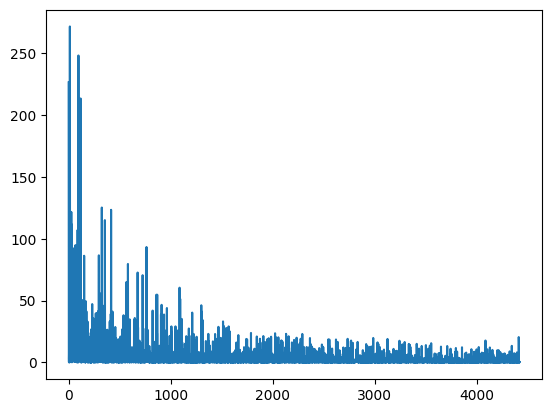

In [33]:
# Treinamento

training_loss = []

for epoch in range(NB_EPOCHS):

    loss_fct = MSELoss()

    idx = np.random.randint(0, trainx.shape[0])
    x = trainx[idx].reshape(1, 10)
    batch_target = target[idx].reshape(1, 1)

    prediction = nn(x)
    loss_value = loss_fct(prediction, batch_target)
    training_loss.append(loss_value)
    gradout = loss_fct.backward()
    nn.backward(gradout)

    optimizer.step()

plt.plot(training_loss)

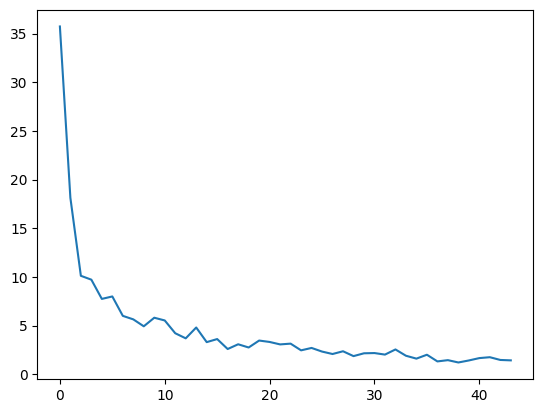

In [34]:
new_training_loss = []
m = 100

for i in range(len(training_loss) // m):
    new_training_loss.append(np.mean(training_loss[i*m:(i+1)*m]))

plt.plot(new_training_loss)
